## 1 Multi-class Classification

In [25]:
from scipy.io import loadmat
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

### 1.1 Dataset

In [26]:
data1 = loadmat("./ex3data1.mat")
X = data1["X"]
y = data1["y"]
print(f"Shape of X is {X.shape}")
print(f"Shape of y is {y.shape}")

Shape of X is (5000, 400)
Shape of y is (5000, 1)


### 1.2 Visualizing the data

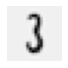

In [27]:
plt.figure(figsize=(1, 1))
pick = np.random.randint(0, 5000)
image_pick = X[pick, :].reshape((20, 20))
plt.imshow(image_pick.transpose(), cmap="binary")
plt.axis("off")
plt.show()

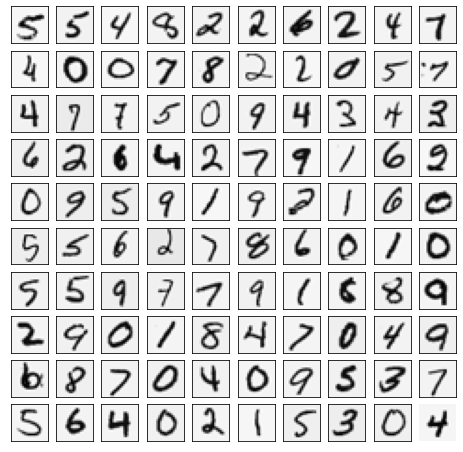

In [7]:
plt.figure(figsize=(8, 8))
for i in range(1, 11):
    for j in range(1, 11):
        pick = np.random.randint(0, 5000)
        image_pick = X[pick, : ].reshape((20, 20))
        plt.subplot(10, 10, 10 * (i - 1) + j)
        plt.imshow(image_pick.transpose(), cmap="binary")
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
plt.axis("off")
plt.show()

### 1.3 Vectorizing Logistic Regression

In [28]:
X = np.c_[np.ones((len(y),1)), X]

In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def lrCostFunction(theta, X, y, lamda=0):
    theta = theta.reshape(-1, 1)
    n_samples = X.shape[0]
    d = X.shape[1]
    assert len(theta) == d
    reg = lamda * np.sum(np.square(theta[1:])) / (2 * n_samples)
    J = np.sum(y * np.log(sigmoid(X @ theta)) + (1 - y) * np.log(1 - sigmoid(X @ theta))) * (-1 / n_samples) + reg
    
    tmp = lamda * theta / n_samples
    tmp[0] = 0
    grad = (X.T @(sigmoid(X@theta) - y)) / n_samples + tmp
    return J, grad.squeeze()

### 1.4 One-vs-all Classification

In [53]:
def trainModel(X, y, lamda):
    n_samples, d = X.shape
    theta0 = np.zeros(d)
    result = minimize(lrCostFunction, x0=theta0, args=(X, y, lamda), jac=True, method="L-BFGS-B")
    if result.success:
        theta = result.x
    else:
        raise ValueError("Traning error!")
    return theta

def oneVsAll(X, y, num_labels, lamda):
    n_samples, d = X.shape
    theta = np.zeros((num_labels, d))
    for i in range(num_labels):
        thetai = trainModel(X, y==(i+1), lamda)
        theta[i] = thetai
    return theta

def predict(X, theta):
    prob = np.argmax(X @ theta.T, axis=1)
    y_pred = prob + 1
    return y_pred

In [66]:
theta = oneVsAll(X, y, num_labels=10, lamda=0.1)
y_pred = predict(X, theta)

In [67]:
print(f"Traning set accuracy is {np.mean(y.squeeze()==y_pred):%}")

Traning set accuracy is 96.480000%


## 2 Neural Networks

In [70]:
data1 = loadmat("./ex3weights.mat.")
theta1 = data1["Theta1"]
theta2 = data1["Theta2"]
print(f"Shape of theta1 is {theta1.shape}")
print(f"Shape of theta2 is {theta2.shape}")

Shape of theta1 is (25, 401)
Shape of theta2 is (10, 26)


In [75]:
def predict(X, theta1, theta2):
    z1 = X @ theta1.T
    a1 = sigmoid(z1)
    a1 = np.c_[np.ones((len(a1), 1)), a1]
    z2 = a1 @ theta2.T
    a2 = sigmoid(z2)
    y_pred = (np.argmax(a2, axis=1)+1)
    return y_pred[:, np.newaxis]

In [76]:
y_pred = predict(X, theta1, theta2)

In [79]:
print(f"Traning set accuracy is {np.mean(y==y_pred):%}")

Traning set accuracy is 97.520000%
